# BA, 512²

| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  12/05/2024          |
| Updated |  12/15/2024          |

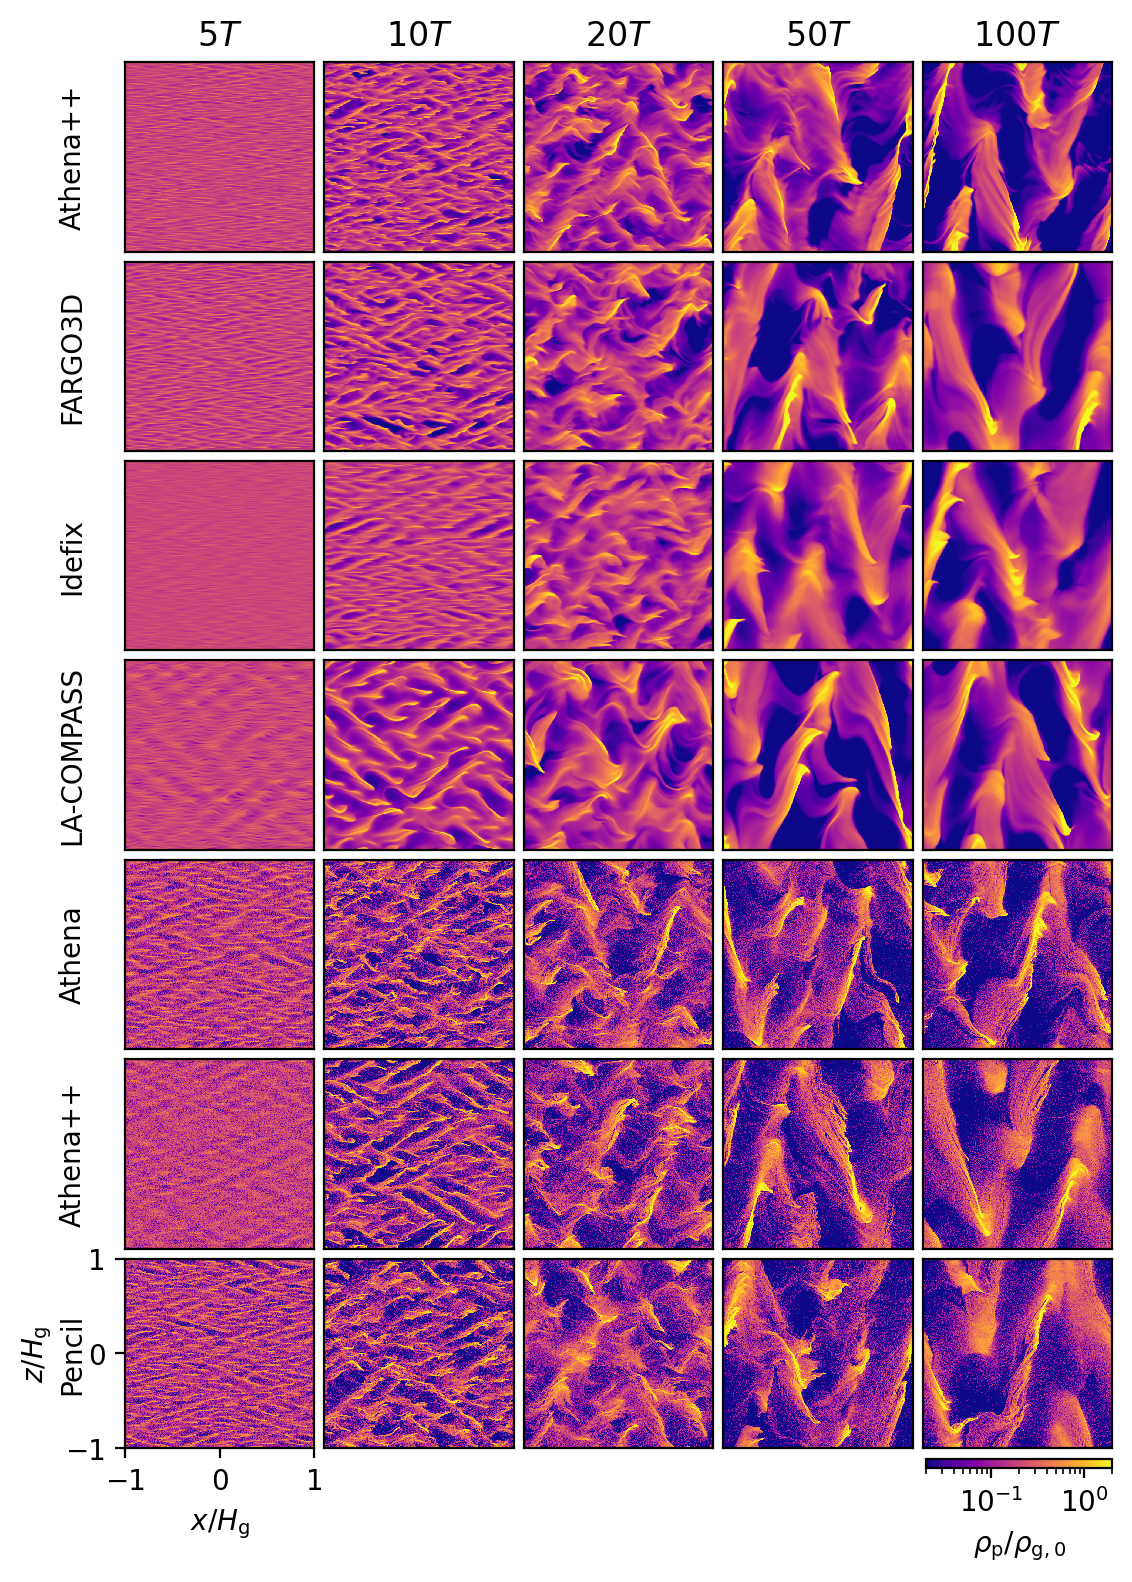

In [1]:
#===============================================================================
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import AxesGrid
import numpy as np

root = f'/home/stanley/github/pfitsplus/sicc/data'
model = 'unstratified'
problem = 'BA'
n_p = 'np1'
res = 512
codes = [[f'dust_fluid/{res}', 'Athena++'],
         [f'dust_fluid/{res}', 'FARGO3D'],
         [f'dust_fluid/{res}', 'Idefix'],
         [f'dust_fluid/{res}', 'LA-COMPASS'],
         [f'dust_particles/{n_p}/{res}', 'Athena'],
         [f'dust_particles/{n_p}/{res}', 'Athena++'], 
         [f'dust_particles/{n_p}/{res}', 'Pencil']]
times = [5, 10, 20, 50, 100]
vmin, vmax = 2e-2, 2e0 # BA CPDD > 85%; CPDD < 5%

# Plot
fig = plt.figure(figsize=(8, 9), dpi=200)
ax_grid = AxesGrid(fig, 111, nrows_ncols=(len(codes), len(times)), axes_pad=0.05,
                   share_all=True, label_mode='1')
for j, code in enumerate(codes):
    path = f'{root}/{model}/{problem}/{code[0]}/{code[1]}'
    row = j*len(times)
    for i, time in enumerate(times):
        if j == 0:
            ax_grid[i].set_title(rf'{time}$T$')
        if i == 0:
            ax_grid[row].text(-0.35, 0.5, f'{code[1]}', va='center',
                              rotation='vertical',
                              transform=ax_grid[row].transAxes)
        snapshot = np.load(f'{path}/{time}.npz')
        x = snapshot['x']
        z = snapshot['z']
        rhop = snapshot['rhop']
        clip = np.clip(rhop, vmin, vmax)
        pcm = ax_grid[row+i].pcolormesh(x, z, clip, cmap='plasma',
                                        rasterized=True,
                                        norm=colors.LogNorm(vmin=vmin,
                                                            vmax=vmax))
        ax_grid[row+i].tick_params(bottom=False, left=False)

# Format plots
x1 = ax_grid[-1].get_position().x1 - 0.02
bot_left = len(ax_grid)-len(times)
plt.colorbar(pcm, orientation='horizontal', shrink=0.15, anchor=(x1, -0.1),
             label=r'$\rho_\mathrm{p}/\rho_\mathrm{g,0}$')
ax_grid[bot_left].set(xlabel=r'$x/H_\mathrm{g}$', ylabel=r'$z/H_\mathrm{g}$')
ax_grid[bot_left].tick_params(bottom=True, left=True)
plt.savefig(f'{problem}-{res}_snapshots.png', dpi=600, bbox_inches='tight',
            pad_inches=0.01)


Samples per 0.25T window
Athena++  : 250
FARGO3D   : 1
Idefix    : 2
LA-COMPASS: 78
Athena    : 25
Athena++  : 5
Pencil    : 27


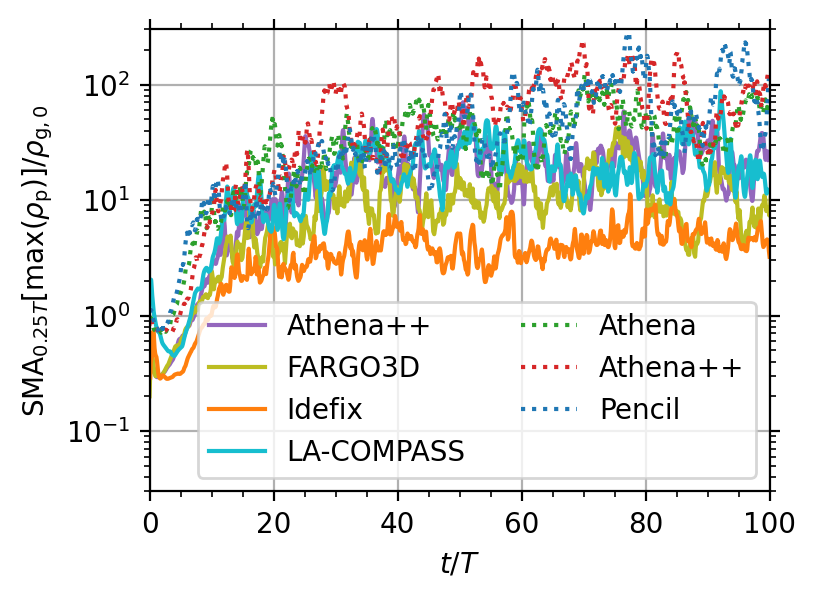

In [25]:
#===============================================================================
import pandas as pd

vers = [['dust_fluid', 'solid'],
        [f'dust_particles/{n_p}', 'dotted']]
codes = [[['Athena++', 'tab:purple'], ['FARGO3D', 'tab:olive'],
          ['Idefix', 'tab:orange'], ['LA-COMPASS', 'tab:cyan']],
         [['Athena', 'tab:green'], ['Athena++', 'tab:red'],
          ['Pencil', 'tab:blue']]]
dt = 1/4  # [T]

# Plot
print(f'Samples per {dt}T window\n=====================')
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
for k, ver in enumerate(vers):
    for j, code in enumerate(codes[k]):
        path = f'{root}/{model}/{problem}/{ver[0]}/{res}/{code[0]}'
        time_series = np.load(f'{path}/time_series.npz')
        window = len(time_series['t'])//int(time_series['t'][-1]/dt)
        print(f'{code[0]:10}: {window}')
        df = pd.DataFrame(data=time_series['maxrhop'], 
        index=time_series['t'])
        df['sma'] = df.rolling(window, center=True).mean()
        ax.plot(df['sma'], c=code[1], label=code[0], ls=ver[1])

# Format plots
ax.grid()
ax.legend(ncol=2)
ax.minorticks_on()
ax.set(xlabel=r'$t/T$', xlim=(0, 100), ylim=(3e-2, 3e2), yscale='log',
       ylabel=rf'$\mathrm{{SMA}}_{{{dt}T}}[\max(\rho_\mathrm{{p}})]$'\
              +r'$/\rho_\mathrm{{g,0}}$')
ax.tick_params(axis='both', which='both', top=True, right=True)
plt.savefig(f'{problem}-{res}_time_series.pdf', bbox_inches='tight',
            pad_inches=0.01)
plt.savefig(f'{problem}-{res}_time_series.png', dpi=600, bbox_inches='tight',
            pad_inches=0.01)

Samples per 5T window
Athena++  : 5000
FARGO3D   : 31
Idefix    : 50
LA-COMPASS: 1652
Athena    : 500
Athena++  : 105
Pencil    : 549


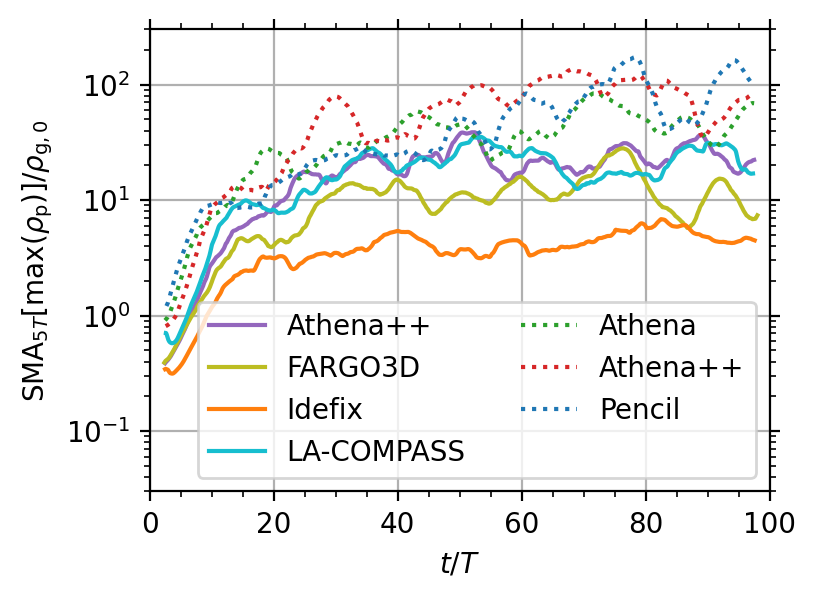

In [19]:
#===============================================================================
import pandas as pd

vers = [['dust_fluid', 'solid'],
        [f'dust_particles/{n_p}', 'dotted']]
codes = [[['Athena++', 'tab:purple'], ['FARGO3D', 'tab:olive'],
          ['Idefix', 'tab:orange'], ['LA-COMPASS', 'tab:cyan']],
         [['Athena', 'tab:green'], ['Athena++', 'tab:red'],
          ['Pencil', 'tab:blue']]]
dt = 5  # [T]

# Plot
print(f'Samples per {dt}T window\n=====================')
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
for k, ver in enumerate(vers):
    for j, code in enumerate(codes[k]):
        path = f'{root}/{model}/{problem}/{ver[0]}/{res}/{code[0]}'
        time_series = np.load(f'{path}/time_series.npz')
        window = len(time_series['t'])//int(time_series['t'][-1]/dt)
        print(f'{code[0]:10}: {window}')
        df = pd.DataFrame(data=time_series['maxrhop'], 
        index=time_series['t'])
        df['sma'] = df.rolling(window, center=True).mean()
        ax.plot(df['sma'], c=code[1], label=code[0], ls=ver[1])

# Format plots
ax.grid()
ax.legend(ncol=2)
ax.minorticks_on()
ax.set(xlabel=r'$t/T$', xlim=(0, 100), ylim=(3e-2, 3e2), yscale='log',
       ylabel=rf'$\mathrm{{SMA}}_{{{dt}T}}[\max(\rho_\mathrm{{p}})]$'\
              +r'$/\rho_\mathrm{{g,0}}$')
ax.tick_params(axis='both', which='both', top=True, right=True)
plt.savefig(f'{problem}-{res}_time_series.pdf', bbox_inches='tight',
            pad_inches=0.01)
plt.savefig(f'{problem}-{res}_time_series.png', dpi=600, bbox_inches='tight',
            pad_inches=0.01)

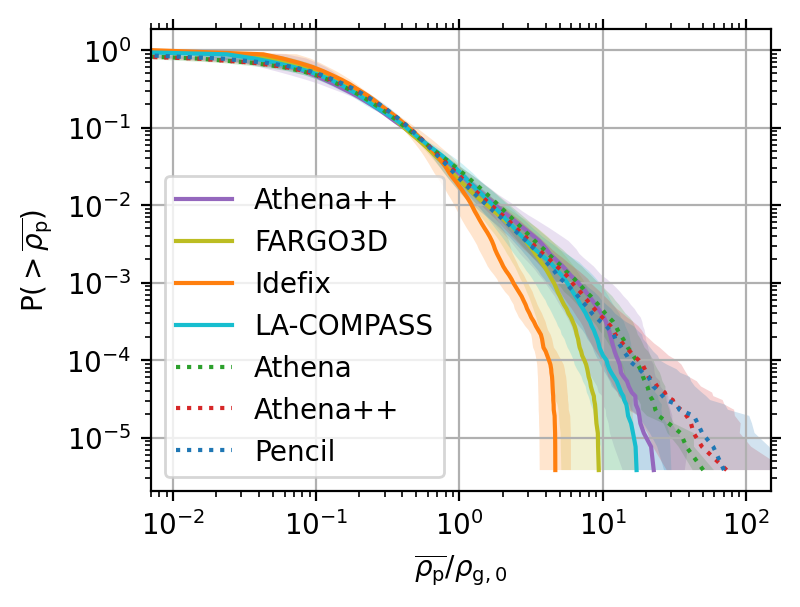

In [9]:
#===============================================================================
times = [20, 50, 100]  # [T]

# Plot
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
indices = -np.unique(np.logspace(np.log2(res**2), 0, num=100, base=2, dtype=int))
for k, ver in enumerate(vers):
    for j, code in enumerate(codes[k]):
        path = f'{root}/{model}/{problem}/{ver[0]}/{res}/{code[0]}'
        rhops = []
        for i, time in enumerate(times):
            snapshot = np.load(f'{path}/{time}.npz')
            sort = np.sort(snapshot['rhop'], axis=None)
            rhops.append(sort)
        rhops = np.asarray(rhops)
        avgs = np.average(rhops, axis=0)
        cdf = np.linspace(1, 0, avgs.size, endpoint=False)
        log = np.log(np.clip(rhops, 1e-45, None))
        std_log = np.std(log, axis=0)
        stds = np.clip(np.exp(std_log), None, 3)
        cdf = np.take_along_axis(cdf, indices, 0)
        avgs = np.take_along_axis(avgs, indices, 0)
        stds = np.take_along_axis(stds, indices, 0)
        ax.plot(avgs, cdf, c=code[1], label=code[0], ls=ver[1])
        ax.fill_betweenx(cdf, avgs/stds, avgs*stds, alpha=0.2, color=code[1],
                         ec=None)

# Format plots
ax.grid()
ax.legend()
ax.minorticks_on()
ax.set(xlim=(7e-3, 1.5e2), xscale='log', yscale='log', 
       xlabel=r'$\overline{\rho_\mathrm{p}}/\rho_\mathrm{g,0}$',
       ylabel=r'P$(>\overline{\rho_\mathrm{p}})$')
ax.tick_params(axis='both', which='both', top=True, right=True)
plt.savefig(f'{problem}-{res}_CDF.pdf', bbox_inches='tight',
            pad_inches=0.01)
plt.savefig(f'{problem}-{res}_CDF.png', dpi=600, bbox_inches='tight',
            pad_inches=0.01)